In [30]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt 
pd.set_option('display.max_rows', 500)
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import learning_curve
def evaluate(model, chosen_scoring="f1", names= "Default"):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("Confusion_matrix : ")
    print(confusion_matrix(y_test, y_pred))
    print("Cassification_report : ")
    print(classification_report(y_test, y_pred))
    N, train_score, val_score = learning_curve(model, X_train_scaled, y_train, cv =3, scoring = chosen_scoring, train_sizes = np.linspace(0.1, 1, 10))
    plt.figure(figsize=(10, 6))
    plt.plot(N, train_score.mean(axis= 1), label = 'train score')
    plt.xlabel("Data Set %")
    plt.plot(N, val_score.mean(axis= 1), label = 'val score')
    plt.ylabel(chosen_scoring)
    plt.title(names)
    plt.legend()
    plt.show()

In [31]:
files = [file for file in os.listdir("assets/best_models/cryptos")]
for file in files:
    print(file)
files2 = [file2 for file2 in os.listdir("assets/best_models/nasdaq")]
for file2 in files2:
    print(file2)

année_2021_Nov_DF_BCRP_BestMarkowitz.csv
rdm3_DF_BCRP_BestMarkowitz.csv
année_2021_Oct_DF_BCRP_BestMarkowitz.csv
covid_DF_BCRP_BestMarkowitz.csv
rdm1_DF_BCRP_BestMarkowitz.csv
année_2019_flat_DF_BCRP_BestMarkowitz.csv
rdm2_DF_BCRP_BestMarkowitz.csv
année_2018_flat_DF_BCRP_BestMarkowitz.csv
année_2018_DF_BCRP_BestMarkowitz.csv
ukr_war_DF_BCRP_BestMarkowitz.csv
année_2021_Nov_DF_BCRP_BestMarkowitz.csv
rdm3_DF_BCRP_BestMarkowitz.csv
année_2021_Oct_DF_BCRP_BestMarkowitz.csv
covid_DF_BCRP_BestMarkowitz.csv
rdm1_DF_BCRP_BestMarkowitz.csv
année_2019_flat_DF_BCRP_BestMarkowitz.csv
rdm2_DF_BCRP_BestMarkowitz.csv
année_2018_flat_DF_BCRP_BestMarkowitz.csv
année_2018_DF_BCRP_BestMarkowitz.csv
ukr_war_DF_BCRP_BestMarkowitz.csv


In [32]:
all_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("assets/best_models/cryptos/"+file, index_col = [0])
    all_data = pd.concat([all_data, df])
for file2 in files2:
    df = pd.read_csv("assets/best_models/nasdaq/"+file2, index_col = [0])
    all_data = pd.concat([all_data, df])
all_data = all_data.reset_index()
all_data = all_data.drop(['index'], axis = 1)

In [33]:
all_data['algo'].value_counts(normalize=True)

BestMarkowitz    0.547009
BCRP             0.290598
?                0.162393
Name: algo, dtype: float64

In [45]:
all_data

,algo,close_volatility,close_range,vol_volatility,vol_range,market,VIX_range,VIX_volatility,VIX_mean,nbr_of_cryptos_tweets,nbr_of_nasdaq_tweets
0,1,0.050177,727.423591,0.348991,6.858501e+09,cryptos,0.060390,3.629999,17.019095,370.0,8.0
1,0,0.052885,949.357753,0.318414,5.589550e+09,cryptos,0.070584,2.210475,17.492143,369.0,3.0
2,1,0.040423,589.361485,0.324233,4.991604e+09,cryptos,0.235230,10.119525,20.990190,248.0,1.0
3,1,0.071689,873.130600,0.383052,9.683639e+09,cryptos,0.079223,4.840000,18.425428,287.0,0.0
4,1,0.062372,624.066542,0.455739,5.740273e+09,cryptos,0.099948,7.529999,20.151905,319.0,2.0
5,1,0.055274,469.607933,0.252358,4.638690e+09,cryptos,0.112757,6.610001,20.896952,356.0,1.0
6,0,0.054462,1529.698563,0.286043,6.018066e+09,cryptos,0.096450,4.549546,21.225091,350.0,1.0
7,1,0.036434,816.554350,0.313112,5.408496e+09,cryptos,0.069486,3.700001,18.522182,353.0,1.0
8,1,0.057764,811.367354,0.384486,9.226176e+09,cryptos,0.104860,3.690454,16.354091,363.0,0.0
9,0,0.020841,101.335832,0.134161,1.062781e+09,cryptos,0.414261,15.936468,15.754294,0.0,0.0


In [35]:
all_data['nbr_of_cryptos_tweets'].value_counts()

0.0      24
287.0     5
341.0     3
198.0     3
319.0     2
369.0     2
353.0     2
116.0     2
236.0     2
187.0     2
431.0     1
229.0     1
553.0     1
443.0     1
487.0     1
495.0     1
509.0     1
445.0     1
264.0     1
761.0     1
366.0     1
510.0     1
441.0     1
128.0     1
384.0     1
221.0     1
267.0     1
304.0     1
609.0     1
616.0     1
618.0     1
209.0     1
292.0     1
286.0     1
277.0     1
207.0     1
424.0     1
481.0     1
396.0     1
296.0     1
272.0     1
299.0     1
227.0     1
179.0     1
370.0     1
200.0     1
392.0     1
110.0     1
242.0     1
253.0     1
161.0     1
191.0     1
573.0     1
263.0     1
166.0     1
183.0     1
21.0      1
363.0     1
350.0     1
356.0     1
248.0     1
205.0     1
213.0     1
226.0     1
194.0     1
138.0     1
210.0     1
155.0     1
222.0     1
181.0     1
224.0     1
177.0     1
230.0     1
146.0     1
133.0     1
189.0     1
324.0     1
247.0     1
429.0     1
615.0     1
Name: nbr_of_cryptos_tweets, dtype: int6

In [36]:
#X = all_data[['volatility', 'range']]
all_data['algo'] = all_data['algo'].replace({"BestMarkowitz": 1, "BCRP": 0, "?": 0})
#all_data['volatility2'] = all_data['volatility']**2

In [46]:
all_data['market'] = all_data['market'].replace({'nasdaq': 1, 'cryptos': 0})

TypeError: label_binarize() missing 1 required positional argument: 'y'

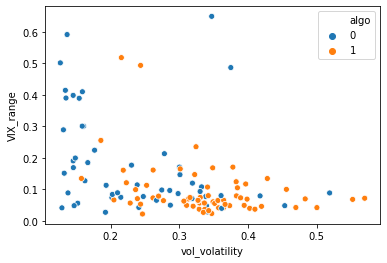

In [47]:
sns.scatterplot(x = 'vol_volatility',y = 'VIX_range', hue = 'algo', data = all_data)
plt.savefig('Regis.jpg')

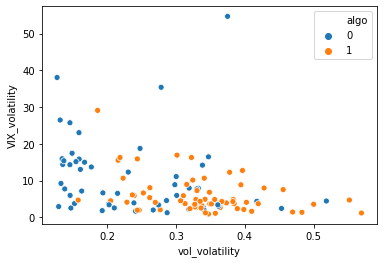

In [48]:
sns.scatterplot(x = 'vol_volatility',y = 'VIX_volatility', hue = 'algo', data = all_data)
plt.savefig('Regis.jpg')

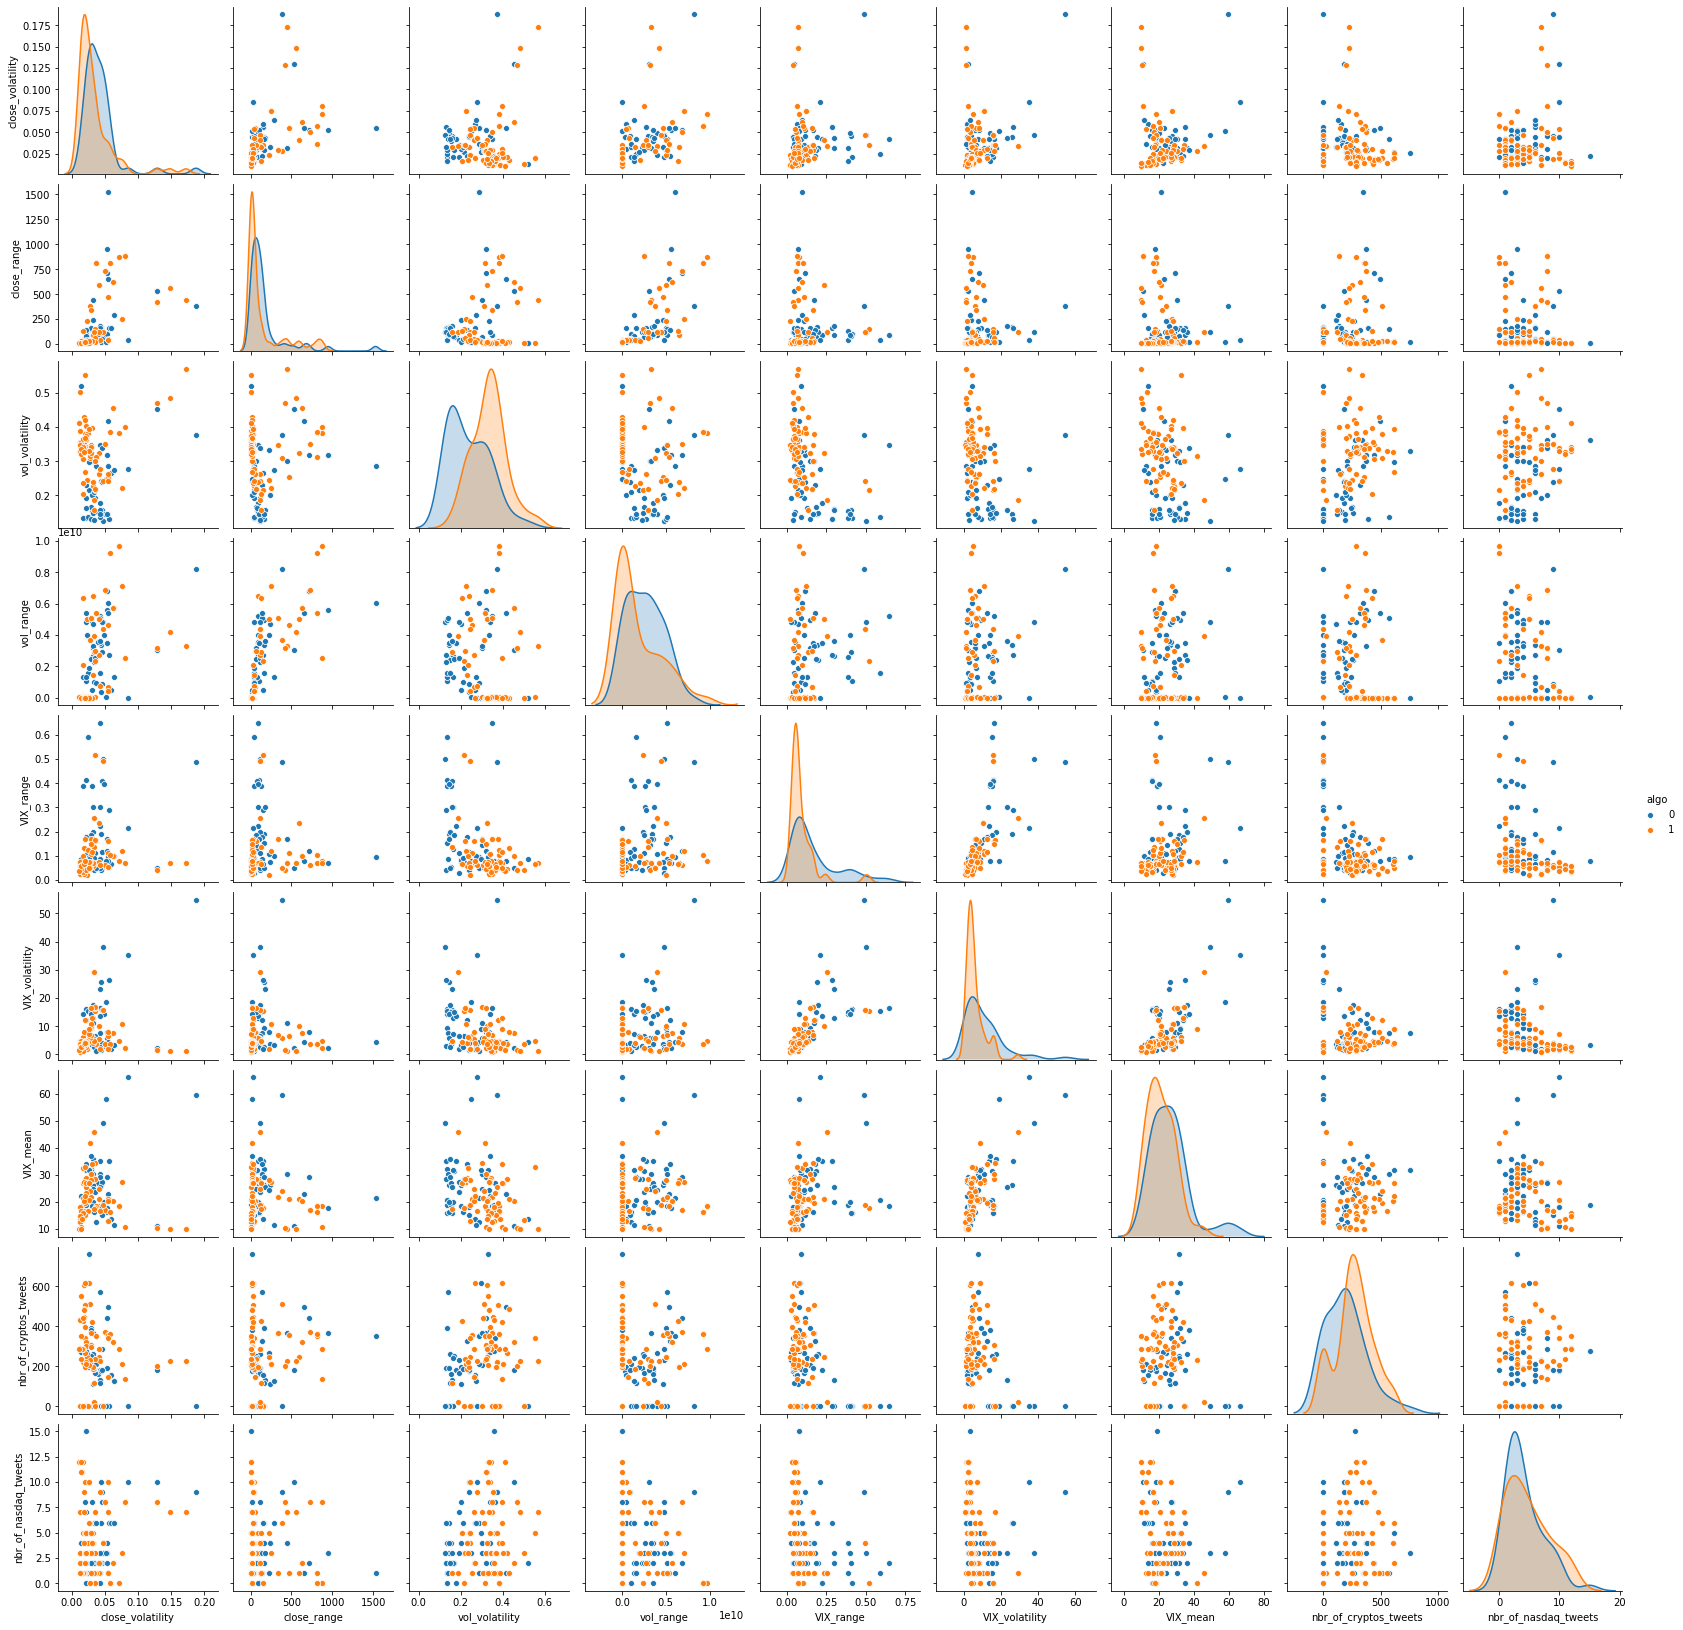

In [40]:
sns.pairplot(data = all_data, hue = 'algo')

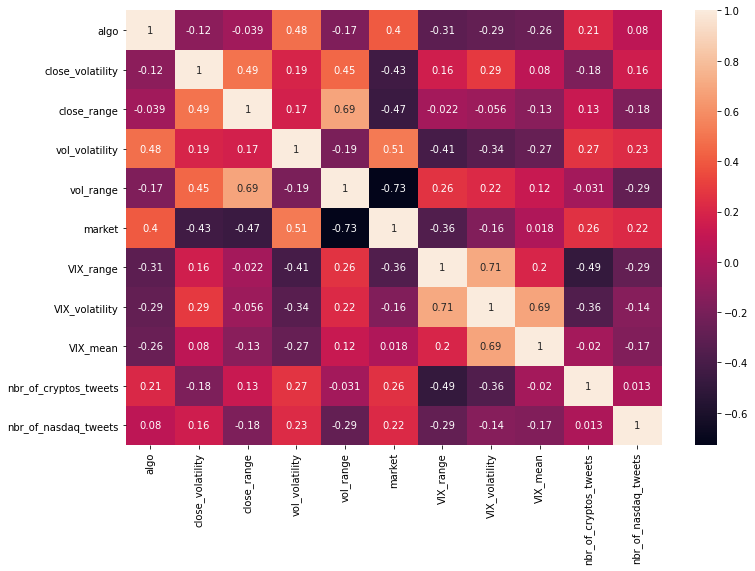

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(all_data.corr(), annot = True);
plt.savefig('Dagobert.jpg')

In [50]:
X = all_data.drop(['algo'], axis = 1)
y = all_data['algo']

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
"""from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly.fit_transform(X)"""

'from sklearn.preprocessing import PolynomialFeatures\npoly = PolynomialFeatures(2)\npoly.fit_transform(X)'

In [52]:
X_scaled = scaler.fit_transform(X)

'from sklearn.preprocessing import PolynomialFeatures\npoly = PolynomialFeatures(2)\npoly.fit_transform(X)'

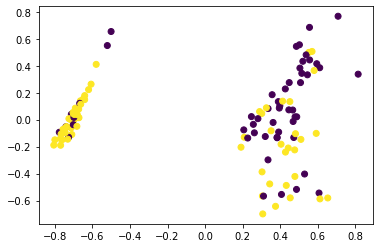

In [53]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
X_pca = pca_2.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], c = y)
plt.savefig('PCA_2.jpg')

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [55]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))
print(model.predict(X_test_scaled))
y_test

1.0
0.7
[1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0]


44     0
4      1
53     0
42     1
10     0
85     1
72     1
94     1
36     0
11     0
40     0
26     0
95     1
104    1
18     0
0      1
62     1
112    1
76     1
101    1
68     1
89     0
115    1
12     0
15     1
69     1
31     0
24     0
56     1
22     0
Name: algo, dtype: int64

In [57]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))
print(model.predict(X_test_scaled))
print(y_test)

0.735632183908046
0.8333333333333334
[0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0]
44     0
4      1
53     0
42     1
10     0
85     1
72     1
94     1
36     0
11     0
40     0
26     0
95     1
104    1
18     0
0      1
62     1
112    1
76     1
101    1
68     1
89     0
115    1
12     0
15     1
69     1
31     0
24     0
56     1
22     0
Name: algo, dtype: int64


In [84]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [131]:
RandomForest = make_pipeline(RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(AdaBoostClassifier(random_state=0))
SVM = make_pipeline(SVC(random_state=0))
KNN = make_pipeline(KNeighborsClassifier(3))

In [132]:
dict_of_model = {"RDF": RandomForest, 'Adabo': AdaBoost, 'SVM': SVM, 'KNN' : KNN}

RDF
Confusion_matrix : 
[[11  4]
 [ 2 15]]
Cassification_report : 
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.79      0.88      0.83        17

    accuracy                           0.81        32
   macro avg       0.82      0.81      0.81        32
weighted avg       0.82      0.81      0.81        32



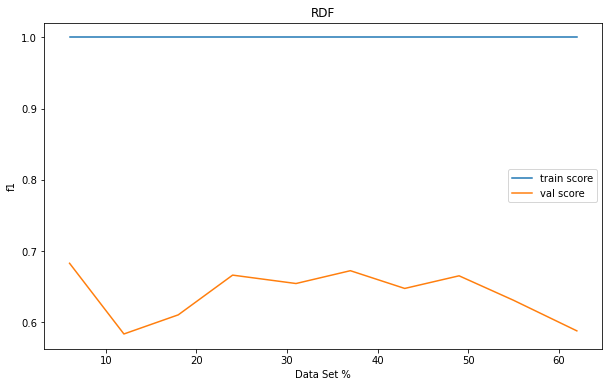

Adabo
Confusion_matrix : 
[[ 8  7]
 [ 6 11]]
Cassification_report : 
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        15
           1       0.61      0.65      0.63        17

    accuracy                           0.59        32
   macro avg       0.59      0.59      0.59        32
weighted avg       0.59      0.59      0.59        32



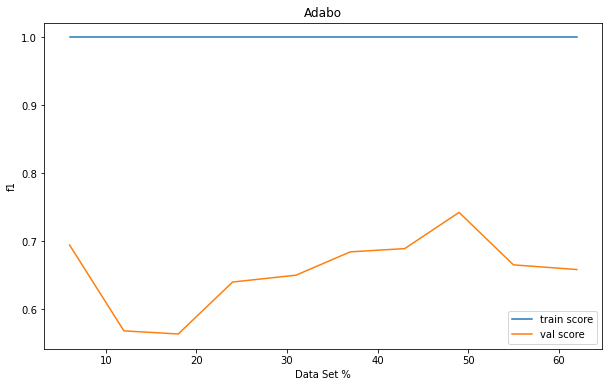

SVM
Confusion_matrix : 
[[12  3]
 [ 3 14]]
Cassification_report : 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.82      0.82      0.82        17

    accuracy                           0.81        32
   macro avg       0.81      0.81      0.81        32
weighted avg       0.81      0.81      0.81        32



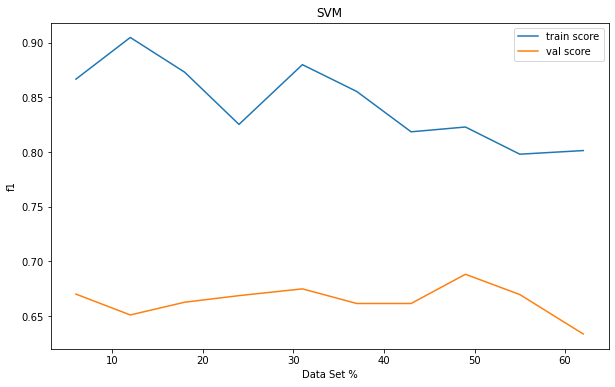

KNN
Confusion_matrix : 
[[13  2]
 [ 4 13]]
Cassification_report : 
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.87      0.76      0.81        17

    accuracy                           0.81        32
   macro avg       0.82      0.82      0.81        32
weighted avg       0.82      0.81      0.81        32



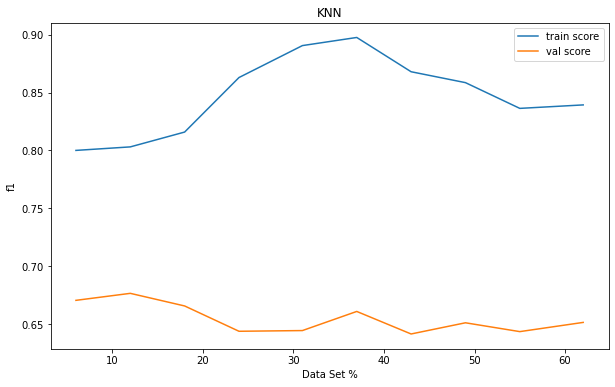

In [133]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
for name, model in dict_of_model.items():
    print(name)
    evaluate(model, "f1", name)

In [60]:
from sklearn.svm import SVC
model = SVC()

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
param_grid = {'C': [0.1,0.5, 1 ,5, 10, 100], 'gamma': [1,0.5, 0.1, 0.05,0.01],'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
             "degree": [1, 2, 3, 4, 5]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = 2, scoring='accuracy')

In [62]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 100],
                         'degree': [1, 2, 3, 4, 5],
                         'gamma': [1, 0.5, 0.1, 0.05, 0.01],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             scoring='accuracy')

In [63]:
grille = grid.best_estimator_
grille

SVC(C=1, degree=1, gamma=1, kernel='sigmoid')

In [64]:
y_pred_scv_test = grille.predict(X_test_scaled)
y_pred_scv_train = grille.predict(X_train_scaled)

In [65]:
grille.score(X_train_scaled, y_train)

0.7011494252873564

In [66]:
f1_score(y_train, y_pred_scv_train)

0.723404255319149

In [192]:
f1_score(y_test, y_pred_scv_test)

0.8125

In [193]:
grille.score(X_test_scaled, y_test)

0.8125

In [67]:
grille.predict(X_test_scaled)

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0])

In [68]:
y_test

44     0
4      1
53     0
42     1
10     0
85     1
72     1
94     1
36     0
11     0
40     0
26     0
95     1
104    1
18     0
0      1
62     1
112    1
76     1
101    1
68     1
89     0
115    1
12     0
15     1
69     1
31     0
24     0
56     1
22     0
Name: algo, dtype: int64

0.7096774193548387
0.8125
[0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1]
Confusion_matrix : 
[[13  2]
 [ 4 13]]
Cassification_report : 
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.87      0.76      0.81        17

    accuracy                           0.81        32
   macro avg       0.82      0.82      0.81        32
weighted avg       0.82      0.81      0.81        32



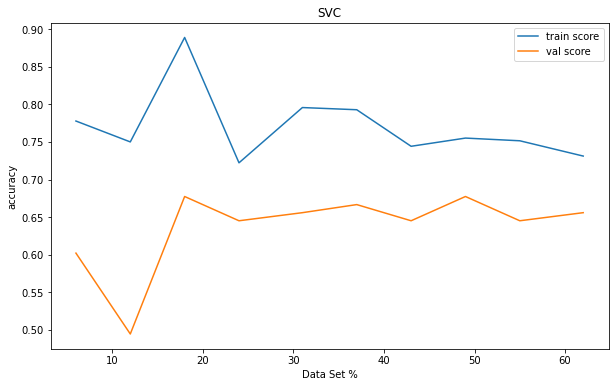

In [198]:
from sklearn.svm import SVC
model = SVC(C=0.5, degree=1, gamma=1, kernel='sigmoid')
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))
print(model.predict(X_test_scaled))
y_test
chosen_scoring = "accuracy"
names = 'SVC'
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Confusion_matrix : ")
print(confusion_matrix(y_test, y_pred))
print("Cassification_report : ")
print(classification_report(y_test, y_pred))
N, train_score, val_score = learning_curve(model, X_train_scaled, y_train, cv =3, scoring = chosen_scoring, train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(10, 6))
plt.plot(N, train_score.mean(axis= 1), label = 'train score')
plt.xlabel("Data Set %")
plt.plot(N, val_score.mean(axis= 1), label = 'val score')
plt.ylabel(chosen_scoring)
plt.title(names)
plt.legend()
plt.show()